# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mythinkstats import read_data, cohen_effect_size, pmf_observer_bias, pmf_observer_unbias, pmf_expectation, \
pmf_variance
print('Ready')

Ready


Again, I'll load the NSFG pregnancy file and select live births:

In [2]:
preg = read_data('ThinkStats2/code/2002FemPreg.dct', 'ThinkStats2/code/2002FemPreg.dat.gz')
live = preg[preg.outcome == 1]
print(live.shape)

(9148, 244)


Here's the histogram of birth weights:

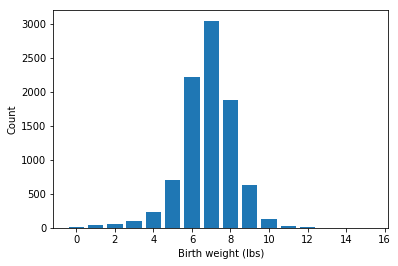

In [3]:
hist = live.birthwgt_lb.value_counts()
plt.bar(hist.index, hist.values)
plt.xlabel('Birth weight (lbs)')
plt.ylabel('Count')
plt.show()

To normalize the disrtibution, we could divide through by the total count:

In [4]:
pmf = hist / hist.sum()

The result is a Probability Mass Function (PMF).

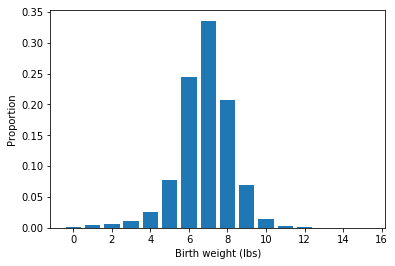

In [5]:
plt.bar(pmf.index, pmf.values)
plt.xlabel('Birth weight (lbs)')
plt.ylabel('Proportion')
plt.show()

More directly, we can create a Pmf object.

In [6]:
pmf = pd.Series([1, 2, 2, 3, 5]).value_counts(normalize=True, sort=False)
pmf

1    0.2
2    0.4
3    0.2
5    0.2
dtype: float64

`Pmf` provides `Prob`, which looks up a value and returns its probability:

In [7]:
pmf[2]

0.4

The bracket operator does the same thing.

In [8]:
pmf[2]

0.4

The `Incr` method adds to the probability associated with a given values.

In [9]:
pmf[2] += 0.2
pmf[2]

0.6000000000000001

The `Mult` method multiplies the probability associated with a value.

In [10]:
pmf[2] *= 0.5
pmf[2]

0.30000000000000004

`Total` returns the total probability (which is no longer 1, because we changed one of the probabilities).

In [11]:
pmf.sum()

0.8999999999999999

`Normalize` divides through by the total probability, making it 1 again.

In [12]:
pmf /= pmf.sum()
pmf.sum()

1.0000000000000002

Here's the PMF of pregnancy length for live births.

In [13]:
pmf = live.prglngth.value_counts(normalize=True)

Here's what it looks like plotted with `Hist`, which makes a bar graph.

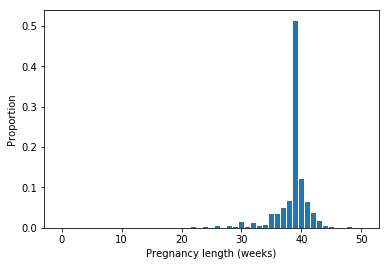

In [14]:
plt.bar(pmf.index, pmf.values)
plt.xlabel('Pregnancy length (weeks)')
plt.ylabel('Proportion')
plt.show()

Here's what it looks like plotted with `Pmf`, which makes a step function.

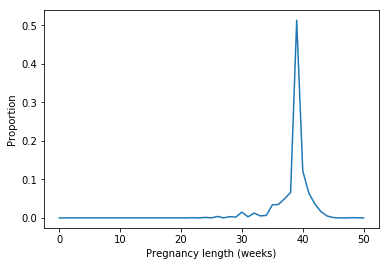

In [15]:
pmf = pmf.sort_index()
plt.plot(pmf.index, pmf.values)
plt.xlabel('Pregnancy length (weeks)')
plt.ylabel('Proportion')
plt.show()

We can use `MakeFrames` to return DataFrames for all live births, first babies, and others.

In [16]:
live = preg[preg.outcome == 1]
first = live[live.birthord == 1]
other = live[live.birthord != 1]

Here are the distributions of pregnancy length.

In [17]:
pmf_first = first.prglngth.value_counts(normalize=True).sort_index()
pmf_other = other.prglngth.value_counts(normalize=True).sort_index()

And here's the code that replicates one of the figures in the chapter.

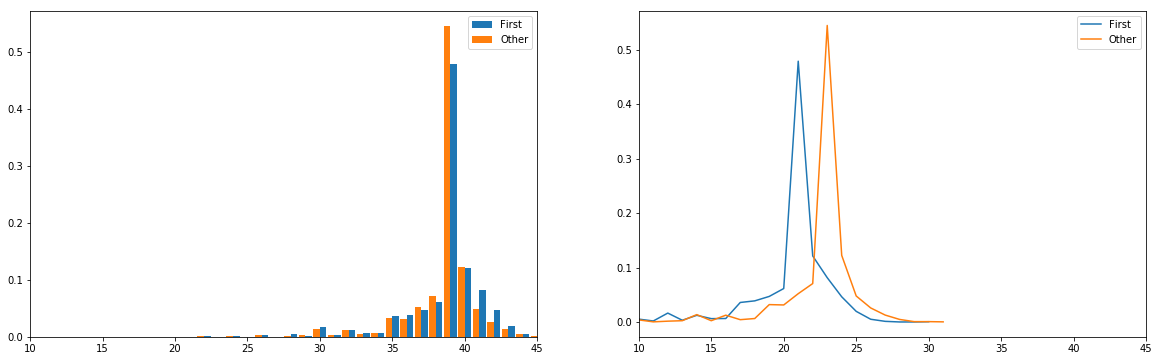

In [18]:
width=0.45
xlim = (10, 45)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
axes[0].bar(pmf_first.index, pmf_first.values, width=width, align='edge', label='First')
axes[0].bar(pmf_other.index, pmf_other.values, width=-width, align='edge', label='Other')
axes[0].legend()
axes[0].set_xlim(*xlim)

axes[1].plot(pmf_first.values, label='First')
axes[1].plot(pmf_other.values, label='Other')
axes[1].legend()
axes[1].set_xlim(*xlim)

plt.show()

Here's the code that generates a plot of the difference in probability (in percentage points) between first babies and others, for each week of pregnancy (showing only pregnancies considered "full term"). 

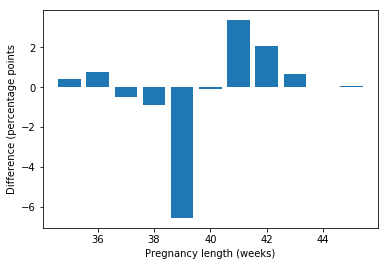

In [19]:
weeks = range(35, 46)
diffs = []
for week in weeks:
    p1 = pmf_first[week]
    p2 = pmf_other[week]
    diff = 100 * (p1 - p2)
    diffs.append(diff)

plt.bar(weeks, diffs)
plt.xlabel('Pregnancy length (weeks)')
plt.ylabel('Difference (percentage points')
plt.show()

### Biasing and unbiasing PMFs

Here's the example in the book showing operations we can perform with `Pmf` objects.

Suppose we have the following distribution of class sizes.

In [20]:
d = { 7: 8, 12: 8, 17: 14, 22: 4, 
     27: 6, 32: 12, 37: 8, 42: 3, 47: 2 }

index = list(d.keys())
pmf = pd.Series(d).sort_index() / sum(d.values())
pmf

7     0.123077
12    0.123077
17    0.215385
22    0.061538
27    0.092308
32    0.184615
37    0.123077
42    0.046154
47    0.030769
dtype: float64

This function computes the biased PMF we would get if we surveyed students and asked about the size of the classes they are in.

In [21]:
# Implemented pmf_observer_bias

The following graph shows the difference between the actual and observed distributions.

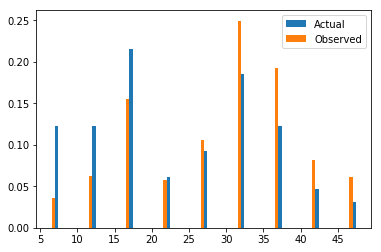

In [22]:
biased = pmf_observer_bias(pmf)
plt.bar(pmf.index, pmf.values, label='Actual', width=0.45, align='edge')
plt.bar(biased.index, biased.values, label='Observed', width=-0.45, align='edge')
plt.legend()
plt.show()

The observed mean is substantially higher than the actual.

In [23]:
print('Actual mean = %.3lf' % pmf_expectation(pmf))
print('Observed mean = %.3lf' % pmf_expectation(biased))

Actual mean = 23.692
Observed mean = 29.123


If we were only able to collect the biased sample, we could "unbias" it by applying the inverse operation.

In [24]:
# Implemented pmf_observer_unbias.

We can unbias the biased PMF:

In [25]:
unbiased = pmf_observer_unbias(biased)
print('Unbiased mean = %.3lf' % pmf_expectation(unbiased))

Unbiased mean = 23.692


And plot the two distributions to confirm they are the same.

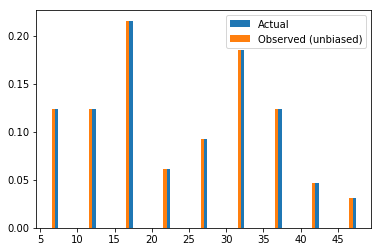

In [26]:
biased = pmf_observer_bias(pmf)
plt.bar(pmf.index, pmf.values, label='Actual', width=0.45, align='edge')
plt.bar(unbiased.index, unbiased.values, label='Observed (unbiased)', width=-0.45, align='edge')
plt.legend()
plt.show()

### Pandas indexing

Here's an example of a small DataFrame.

In [27]:
import numpy as np
import pandas
array = np.random.randn(4, 2)
df = pandas.DataFrame(array)
df

,0,1
0,0.773667,0.388779
1,0.210491,-0.843028
2,-0.674427,-0.037143
3,-0.522041,0.566720


We can specify column names when we create the DataFrame:

In [28]:
columns = ['A', 'B']
df = pandas.DataFrame(array, columns=columns)
df

,A,B
0,0.773667,0.388779
1,0.210491,-0.843028
2,-0.674427,-0.037143
3,-0.522041,0.566720


We can also specify an index that contains labels for the rows.

In [29]:
index = ['a', 'b', 'c', 'd']
df = pandas.DataFrame(array, columns=columns, index=index)
df

,A,B
a,0.773667,0.388779
b,0.210491,-0.843028
c,-0.674427,-0.037143
d,-0.522041,0.566720


Normal indexing selects columns.

In [30]:
df['A']

a    0.773667
b    0.210491
c   -0.674427
d   -0.522041
Name: A, dtype: float64

We can use the `loc` attribute to select rows.

In [31]:
df.loc['a']

A    0.773667
B    0.388779
Name: a, dtype: float64

If you don't want to use the row labels and prefer to access the rows using integer indices, you can use the `iloc` attribute:

In [32]:
df.iloc[0]

A    0.773667
B    0.388779
Name: a, dtype: float64

`loc` can also take a list of labels.

In [33]:
indices = ['a', 'c']
df.loc[indices]

,A,B
a,0.773667,0.388779
c,-0.674427,-0.037143


If you provide a slice of labels, `DataFrame` uses it to select rows.

In [34]:
df['a':'c']

,A,B
a,0.773667,0.388779
b,0.210491,-0.843028
c,-0.674427,-0.037143


If you provide a slice of integers, `DataFrame` selects rows by integer index.

In [35]:
df[0:2]

,A,B
a,0.773667,0.388779
b,0.210491,-0.843028


But notice that one method includes the last elements of the slice and one does not.

In general, I recommend giving labels to the rows and names to the columns, and using them consistently.

## Exercises

### Exercise 3.1a

Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [36]:
resp = read_data('ThinkStats2/code/2002FemResp.dct', 'ThinkStats2/code/2002FemResp.dat.gz')
resp.shape

(7643, 3087)

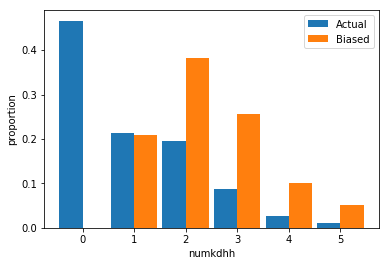

In [37]:
# Solution goes here
pmf = resp.numkdhh.value_counts(normalize=True)
biased = pmf_observer_bias(pmf)
plt.bar(pmf.index, pmf.values, label='Actual', width=-0.45, align='edge')
plt.bar(biased.index, biased.values, label='Biased', width=0.45, align='edge')
plt.xlabel('numkdhh')
plt.ylabel('proportion')
plt.legend()
plt.show()

### Exercise 3.2

- Functions to compute a PMF's mean (expectation) and variance.
- Demonstrate with the PMF for `numkdhh`.

In [38]:
print(pmf)
print('E[pmf] = %.3lf' % pmf_expectation(pmf))
print('Var[pmf] = %.3lf' % pmf_variance(pmf))

0    0.466178
1    0.214052
2    0.196258
3    0.087139
4    0.025644
5    0.010729
Name: numkdhh, dtype: float64
E[pmf] = 1.024
Var[pmf] = 1.413


### Exercise 3.3

I started this book with the question, "Are first babies more likely to be late?" To address it, I computed the difference in means between groups of babies, but I ignored the possibility that there might be a difference between first babies and others for the same woman.

To address this version of the question, select respondents who have at least two live births and compute pairwise differences. Does this formulation of the question yield a different result?

Hint: use `nsfg.MakePregMap`:

In [39]:
live = preg[preg.outcome == 1]
first = live.loc[preg.birthord == 1]
other = live.loc[preg.birthord != 1]

In [40]:
firstgb = first.groupby('caseid')
diffs = []

for _, row in other.iterrows():
    a = int(firstgb.get_group(row.caseid).prglngth)
    b = int(row.prglngth)
    diffs.append(a - b)
    
pmf = pd.Series(diffs).value_counts(normalize=True)

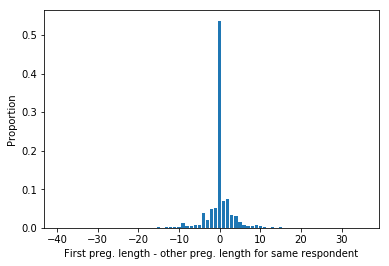

In [41]:
plt.bar(pmf.index, pmf.values)
plt.xlabel('First preg. length - other preg. length for same respondent')
plt.ylabel('Proportion')
plt.show()

### Exercise 3.4

In most foot races, everyone starts at the same time. If you are a fast runner, you usually pass a lot of people at the beginning of the race, but after a few miles everyone around you is going at the same speed.
When I ran a long-distance (209 miles) relay race for the first time, I noticed an odd phenomenon: when I overtook another runner, I was usually much faster, and when another runner overtook me, he was usually much faster.

At first I thought that the distribution of speeds might be bimodal; that is, there were many slow runners and many fast runners, but few at my speed.

Then I realized that I was the victim of a bias similar to the effect of class size. The race was unusual in two ways: it used a staggered start, so teams started at different times; also, many teams included runners at different levels of ability.

As a result, runners were spread out along the course with little relationship between speed and location. When I joined the race, the runners near me were (pretty much) a random sample of the runners in the race.

So where does the bias come from? During my time on the course, the chance of overtaking a runner, or being overtaken, is proportional to the difference in our speeds. I am more likely to catch a slow runner, and more likely to be caught by a fast runner. But runners at the same speed are unlikely to see each other.

Write a function called `ObservedPmf` that takes a `Pmf` representing the actual distribution of runners’ speeds, and the speed of a running observer, and returns a new `Pmf` representing the distribution of runners’ speeds as seen by the observer.

To test your function, you can use `relay.py`, which reads the results from the James Joyce Ramble 10K in Dedham MA and converts the pace of each runner to mph.

Compute the distribution of speeds you would observe if you ran a relay race at 7 mph with this group of runners.

In [42]:
import sys
sys.path.append('ThinkStats2/code')
import relay

results = relay.ReadResults(filename='ThinkStats2/code/Apr25_27thAn_set1.shtml')
speeds = relay.GetSpeeds(results)
speeds = relay.BinData(speeds, 3, 12, 100)

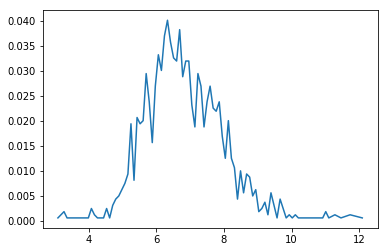

In [43]:
pmf = pd.Series(speeds).value_counts(normalize=True).sort_index()
plt.plot(pmf.index, pmf.values)
plt.show()

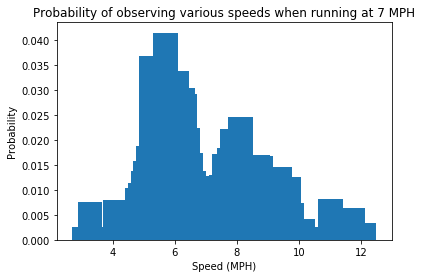

In [44]:
# Solution goes here
def observed_pmf(speeds, observer_speed):
    # The closer to observer_speed, the less likely the observer is 
    # to observe the speed. Each speed has an existing proportion. 
    # Multiply the existing proportion for each speed by the absolute 
    # difference relative the observer_speed.
    pmf = pd.Series(speeds).value_counts(normalize=True).sort_index()
    for speed, count in pmf.items():
        pmf[speed] *= abs(speed - observer_speed)
    return pmf / pmf.sum()
    
speed = speeds.mean().round()
obs = observed_pmf(speeds, speed)
plt.bar(obs.index, obs.values)
plt.xlabel('Speed (MPH)')
plt.ylabel('Probability')
plt.title('Probability of observing various speeds when running at %d MPH' % speed)
plt.show()

In [45]:
print('Done')

Done
